In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, confusion_matrix,  roc_curve, precision_recall_curve, accuracy_score, roc_auc_score
from keras.models import Sequential
from keras.layers import Dense, Dropout,Lambda, Activation,Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import Adam
from keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf
import os

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dropout(0.25),
    Dense(512, activation=tf.nn.relu),
    Dropout(0.25),    
    Dense(256, activation=tf.nn.relu),
    Dropout(0.25),
    Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [3]:
import os
fn = os.getcwd() + "\\" +  "mymodel-dig.h5"  
model.load_weights(fn)

In [0]:
fn =  "mymodel.h5"
model.save_weights(fn)

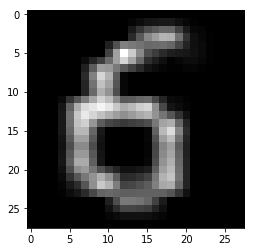

[5]
[[0.03972494 0.04050328 0.03437597 0.10870641 0.04576951 0.27795967
  0.12343015 0.02858047 0.17637272 0.12457698]]


In [6]:
import cv2
gray = cv2.imread("6.png", cv2.IMREAD_GRAYSCALE)
gray = cv2.resize(255-gray, (28, 28))
gray = gray/255
plt.imshow(gray, cmap=plt.get_cmap('gray'))
plt.show()
pr = model.predict_classes(gray.reshape(1, 28, 28))
print(pr)
pr = model.predict(gray.reshape(1, 28, 28))
print(pr)

